### Ejercicio 2 -TP2 CONTROL 2024

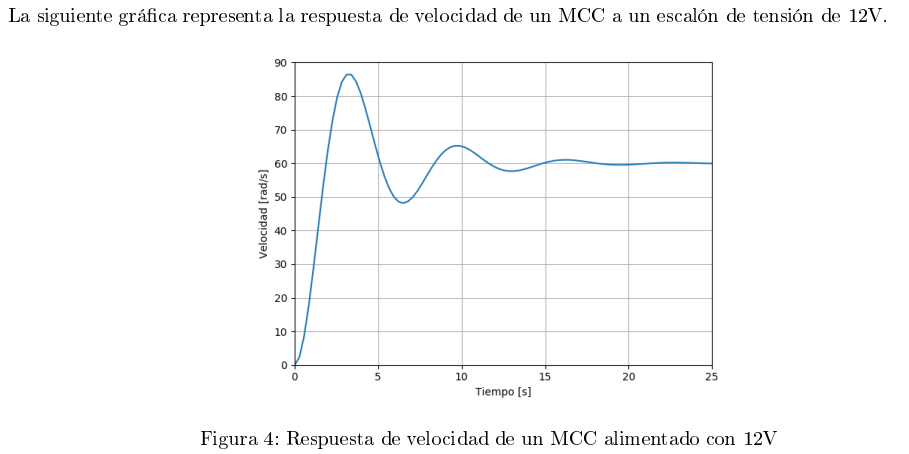

Los valores característicos de esta respuesta obtenidos a partir de "step_info" son: 

- **RiseTime** = 1.26  
- **SettlingTime** = 14.13  
- **SettlingMin** = 48.15  
- **SettlingMax** = 86.6  
- **Overshoot** = 44.41 %  
- **Undershoot** = 0.0  
- **Peak** = 86.66  
- **PeakTime** = 3.25  
- **SteadyStateValue** = 60  


In [13]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd

fuente = {'family': 'fantasy',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        } 

### Apartado A

- Marcar sobre la figura donde se encuentran y/o como se obtienen de la misma los parámetros RiseTime,
Overshoot, Peak, PeakTtime y SteadyStateValue

### Apartado B

- Identificar los parámetros característicos del sistema de 2do orden: 

- ζ (coeficiente de amortiguamiento)
- σ (constante de tiempo)
- ωn (frecuencia natural no amortiguada)
- ωd (frecuencia natural amortiguada)
- K (ganancia estática)

y obtener la función de transferencia $ H(s)$  de dicho sistema, sabiendo que no tiene ningún cero ni polo adicional.


### Definiciones de Parámetros Característicos de un Sistema de Segundo Orden

1. **ζ (Coeficiente de amortiguamiento):**
   - Representa la cantidad de amortiguamiento presente en el sistema. Este parámetro indica cómo las oscilaciones en la respuesta del sistema disminuyen con el tiempo.
   - Su valor determina el comportamiento de la respuesta del sistema: 
     - Si $\zeta = 0$, el sistema es **no amortiguado** y tendrá oscilaciones continuas.
     - Si $0 < \zeta < 1$, el sistema es **subamortiguado** y exhibirá oscilaciones que disminuyen con el tiempo.
     - Si $\zeta = 1$, el sistema es **críticamente amortiguado** y alcanzará el estado estable tan rápido como sea posible sin oscilar.
     - Si $\zeta > 1$, el sistema es **sobreamortiguado** y no oscilará, pero tomará más tiempo en llegar a su estado estable.

2. **σ (Constante de tiempo):**
   - Es el inverso de la constante de tiempo asociada con el decaimiento exponencial de la respuesta del sistema. Se relaciona con el coeficiente de amortiguamiento y la frecuencia natural por la ecuación:
     
    $$ \sigma = \zeta \omega_n$$
   
   - Indica la rapidez con la que la respuesta del sistema decae hacia el estado estable. Un mayor valor de $\sigma$ implica un decaimiento más rápido.

3. **ωn (Frecuencia natural no amortiguada):**
   - Es la frecuencia a la que el sistema oscilaría si no hubiera ningún amortiguamiento presente ($\zeta = 0$).
   - Determina la velocidad de oscilación del sistema en condiciones ideales sin pérdida de energía. Un valor más alto de $\omega_n$ indica que el sistema oscilaría más rápidamente.

4. **ωd (Frecuencia natural amortiguada):**
   - Es la frecuencia de oscilación de un sistema amortiguado. Está relacionada con la frecuencia natural no amortiguada y el coeficiente de amortiguamiento:

     $$\omega_d = \omega_n \sqrt{1 - \zeta^2}$$

   - Describe la frecuencia real de las oscilaciones del sistema, teniendo en cuenta el amortiguamiento. Si el sistema es críticamente o sobreamortiguado, $\omega_d$ no será aplicable, ya que el sistema no oscilará.

5. **K (Ganancia estática):**
   - Representa la ganancia del sistema en estado estacionario, es decir, la relación entre la salida y la entrada del sistema cuando se alcanza el equilibrio (estado estable).
   - La ganancia estática determina cuánto amplifica o atenúa un sistema la entrada aplicada. Un valor mayor de $K$ indica que la salida será proporcionalmente mayor con respecto a la entrada cuando el sistema alcanza su estado estable.


In [59]:
tr = 1.26           #RiseTime
ts = 14.13          #SettlingTime
ts_min = 48.15      #SettlingMin
ts_max = 86.6       #SettlingMax
overshoot = 44.41   #Overshoot
PEAK = 86.66        #Peak
SSV = 60            #SteadyStateValue
mp= 28.8 
tp = 3.25 
ValueInputStep=12 

- $σ$ (constante de tiempo)
$$ \sigma = \frac{4.6}{t_s}$$


In [47]:
sigma = 4.6/14.13
print(f"La constante de tiempo (sigma) es: {sigma:.4f}") 

La constante de tiempo (sigma) es: 0.3255


- $ωd$ (frecuencia natural amortiguada)
$$ \omega_d = \frac{\pi}{t_s}$$

In [46]:
wd = np.pi / tp
print(f"La frecuencia natural (omega n) es: {wd:.4f}")

La frecuencia natural (omega n) es: 0.9666


- ζ (coeficiente de amortiguamiento)


$$\zeta = \sqrt{\frac{1}{1 + \left( \frac{\pi}{-\ln\left(\frac{\text{Overshoot}}{100}\right)} \right)^2}}$$


In [45]:
OS_decimal = overshoot / 100  

zeta = np.sqrt(1 / (1 + (np.pi / (-np.log(OS_decimal)))**2))

print(f"El coeficiente de amortiguamiento (zeta) es: {zeta:.4f}")


El coeficiente de amortiguamiento (zeta) es: 0.2502


- $ω_n$ (frecuencia natural no amortiguada)
 $$ \omega_n = 1.8* t_r$$

In [49]:
wn = wd / np.sqrt(1 - zeta**2)
print(f"La frecuencia natural no amortiguada (omega n) es: {wn:.4f}")

La frecuencia natural no amortiguada (omega n) es: 0.9984


In [60]:
K=SSV/ValueInputStep
K

5.0

In [61]:
s = ct.tf('s')
H= K*(wn**2)/((s**2+2*zeta*wn*s+wn**2))
H

TransferFunction(array([4.98389124]), array([1.        , 0.49951109, 0.99677825]))

array([[list([<matplotlib.lines.Line2D object at 0x0000023A30C07680>]),
        list([])]], dtype=object)

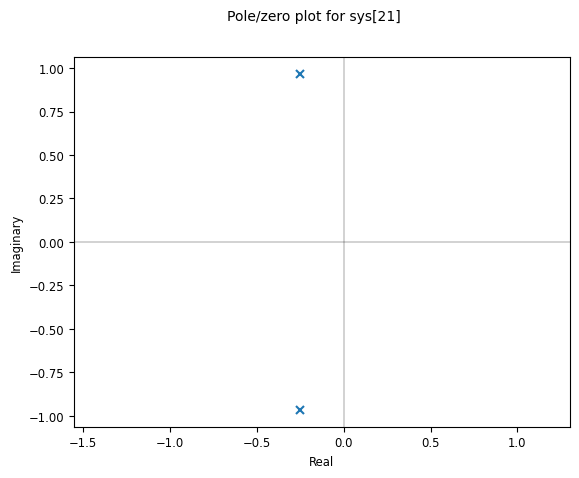

In [63]:
ct.pzmap(H)

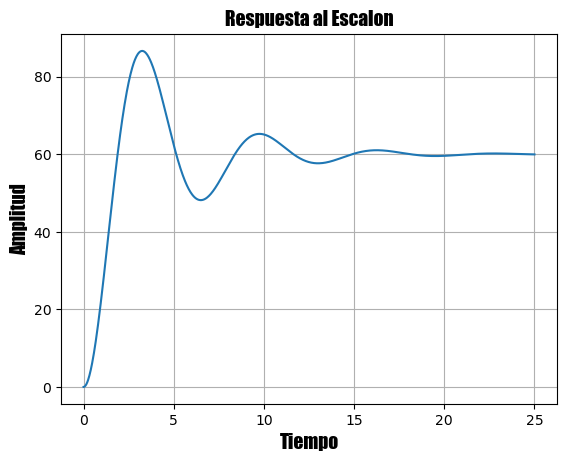

In [64]:
T = np.linspace(0,25,1001)
t,y = ct.step_response(H*12,T)

plt.plot(t,y)
plt.title('Respuesta al Escalon', fontdict=fuente)
plt.xlabel('Tiempo', fuente)
plt.ylabel('Amplitud', fontdict=fuente)
plt.grid()

### Apartado C

- Verificar los parámetros mediante la simulación numérica de la respuesta del sistema a un escalón de 12V

In [36]:
info = ct.step_info(H) 

#####################De aca para abajo es solo para armar una tabla mas legible##############################

df_info = pd.DataFrame(list(info.items()), columns=['Propiedad', 'Valor'])

styled_df_info = df_info.style.set_caption("Información de Respuesta al Escalón de H(s)")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16pt'), ('font-weight', 'bold'), ('color', '#ffffff'), ('background-color', '#333333'), ('padding', '10px')]
    }, {
        'selector': 'thead',
        'props': [('font-weight', 'bold'), ('background-color', '#333333'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'thead th',
        'props': [('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'tr:nth-child(even)',
        'props': [('background-color', '#444444'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'tr:nth-child(odd)',
        'props': [('background-color', '#555555'), ('color', '#ffffff'), ('text-align', 'center'), ('border', '1px solid #ffffff')]
    }, {
        'selector': 'td',
        'props': [('text-align', 'center'), ('border', '1px solid #ffffff')]
    }])\
    .set_properties(**{'font-size': '12pt'})
    
styled_df_info

,Propiedad,Valor
0,RiseTime,1.258037
1,SettlingTime,14.341621
2,SettlingMin,0.804059
3,SettlingMax,1.446641
4,Overshoot,44.424788
5,Undershoot,0.000000
6,Peak,1.446641
7,PeakTime,3.270896
8,SteadyStateValue,1.001657


### Apartado D

- Graficar el ángulo $\theta(t)$ girado por el MCC cuando se aplica una tensión de 12V. 

- Recordar que $\theta(t) = R_0 \int \omega(t) \, dt$



### Apartado E

Agregar a $H(s)$ un polo adicional, de tal forma que la función de transferencia final resulte:

$$
H_n(s) = H(s) \cdot P(s),
$$

donde $H(s)$ es la función de transferencia obtenida en (b) y $P(s)$ es el polo adicional de la forma:

$$
P(s) = \frac{1}{\frac{s}{p} + 1},
$$

con $p = 5\sigma$, $p = 2\sigma$, $p = \sigma$ y $p = \frac{\sigma}{2}$.

Sacar conclusiones respecto a la respuesta según la posición del polo adicional.


In [67]:
p=10*sigma
s = ct.tf('s')
G0= K*(wn**2)/((s**2+2*zeta*wn*s+wn**2)*(s/p+1))
G0

TransferFunction(array([16.2249821]), array([1.        , 3.75499587, 2.62292899, 3.24499642]))

In [68]:
p=5*sigma
s = ct.tf('s')
G1= K*(wn**2)/((s**2+2*zeta*wn*s+wn**2)*(s/p+1))
G1

TransferFunction(array([8.11249105]), array([1.        , 2.12725348, 1.80985362, 1.62249821]))

In [70]:
p1=2*sigma
s = ct.tf('s')
G2= K*(wn**2)/((s**2+2*zeta*wn*s+wn**2)*(s/p1+1))
G2

TransferFunction(array([3.24499642]), array([1.        , 1.15060804, 1.3220084 , 0.64899928]))

In [72]:
p2=sigma
s = ct.tf('s')
G3= K*(wn**2)/((s**2+2*zeta*wn*s+wn**2)*(s/p2+1))
G3

TransferFunction(array([1.62249821]), array([1.        , 0.82505957, 1.15939332, 0.32449964]))

In [74]:
p3=sigma/2
s = ct.tf('s')
G4= K*(wn**2)/((s**2+2*zeta*wn*s+wn**2)*(s/p3+1))
G4

TransferFunction(array([0.81124911]), array([1.        , 0.66228533, 1.07808579, 0.16224982]))

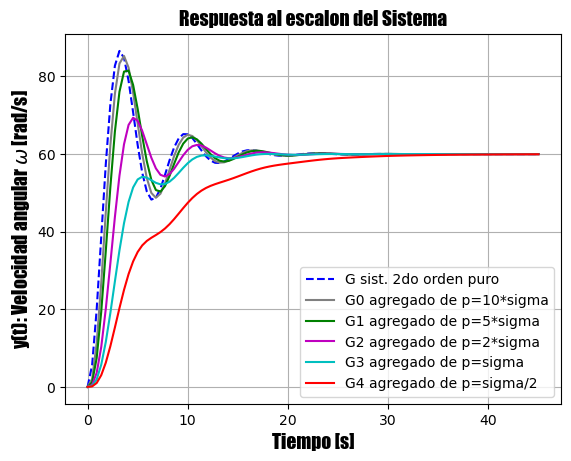

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

In [100]:
t1 = np.linspace(0, 45, 100) 
t,y=ct.step_response(H*12, T=t1)
t,y0=ct.step_response(G0*12, T=t1)
t,y1=ct.step_response(G1*12, T=t1)
t,y2=ct.step_response(G2*12, T=t1)
t,y3=ct.step_response(G3*12, T=t1)
t,y4=ct.step_response(G4*12, T=t1)


plt.plot(t, y, color="b",linestyle='--', label = 'G sist. 2do orden puro')
plt.plot(t, y0, color="gray", label = 'G0 agregado de p=10*sigma')
plt.plot(t, y1, color="g", label = 'G1 agregado de p=5*sigma')
plt.plot(t, y2, color="m", label = 'G2 agregado de p=2*sigma')
plt.plot(t, y3, color="c", label = 'G3 agregado de p=sigma')
plt.plot(t, y4, color="r", label = 'G4 agregado de p=sigma/2')
plt.xlabel('Tiempo [s]', fontdict=fuente)
plt.ylabel(r'y(t): Velocidad angular $\omega$ [rad/s]', fontdict=fuente)
plt.title('Respuesta al escalon del Sistema', fontdict=fuente)
plt.grid()
plt.legend(loc=4)
plt.show()
plt.plot

#### Conclusion

- Los polos cercanos al eje imaginario tienen un efecto más significativo en la respuesta del sistema, lo que puede causar distorsión en la señal.
- En el dominio del tiempo, un polo cercano al eje imaginario puede inducir oscilaciones más pronunciadas y prolongadas en la respuesta temporal. Esto puede manifestarse como un sobreimpulso o un aumento en la duración de las oscilaciones.

### Apartado F

Agregar a $H(s)$ un cero adicional, de tal forma que la función de transferencia final resulte:

$$
H_n(s) = H(s) \cdot C(s),
$$

donde $H(s)$ es la función de transferencia obtenida en (b) y $C(s)$ es el cero adicional de la forma:

$$
C(s) = \frac{s}{\frac{s}{c} + 1},
$$

con $c = 5\sigma$, $c = 2\sigma$, $c = \sigma$ y $c = \frac{\sigma}{2}$.

Sacar conclusiones respecto a la respuesta temporal según la posición del cero adicional.


In [78]:
c=10*sigma
s = ct.tf('s')
H0= K*(wn**2)*(s/c+1)/((s**2+2*zeta*wn*s+wn**2))
H0

TransferFunction(array([ 4.98389124, 16.2249821 ]), array([3.25548478, 1.62615074, 3.24499642]))

In [79]:
c=5*sigma
s = ct.tf('s')
H1= K*(wn**2)*(s/c+1)/((s**2+2*zeta*wn*s+wn**2))
H1

TransferFunction(array([4.98389124, 8.11249105]), array([1.62774239, 0.81307537, 1.62249821]))

In [81]:
c=2*sigma
s = ct.tf('s')
H2= K*(wn**2)*(s/c+1)/((s**2+2*zeta*wn*s+wn**2))
H2

TransferFunction(array([4.98389124, 3.24499642]), array([0.65109696, 0.32523015, 0.64899928]))

In [82]:
c=sigma
s = ct.tf('s')
H3= K*(wn**2)*(s/c+1)/((s**2+2*zeta*wn*s+wn**2))
H3

TransferFunction(array([4.98389124, 1.62249821]), array([0.32554848, 0.16261507, 0.32449964]))

In [83]:
c=sigma/2
s = ct.tf('s')
H4= K*(wn**2)*(s/c+1)/((s**2+2*zeta*wn*s+wn**2))
H4

TransferFunction(array([4.98389124, 0.81124911]), array([0.16277424, 0.08130754, 0.16224982]))

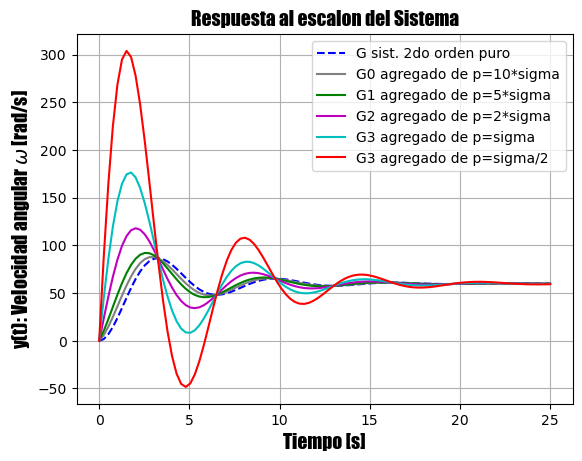

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

In [95]:
t1 = np.linspace(0, 25, 100) 
t,y=ct.step_response(H*12, T=t1)
t,y5=ct.step_response(H0*12, T=t1)
t,y6=ct.step_response(H1*12, T=t1)
t,y7=ct.step_response(H2*12, T=t1)
t,y8=ct.step_response(H3*12, T=t1)
t,y9=ct.step_response(H4*12, T=t1)


plt.plot(t, y, color="b",linestyle='--', label = 'G sist. 2do orden puro')
plt.plot(t, y5, color="gray", label = 'G0 agregado de p=10*sigma')
plt.plot(t, y6, color="g", label = 'G1 agregado de p=5*sigma')
plt.plot(t, y7, color="m", label = 'G2 agregado de p=2*sigma')
plt.plot(t, y8, color="c", label = 'G3 agregado de p=sigma')
plt.plot(t, y9, color="r", label = 'G3 agregado de p=sigma/2')
plt.xlabel('Tiempo [s]', fontdict=fuente)
plt.ylabel(r'y(t): Velocidad angular $\omega$ [rad/s]', fontdict=fuente)
plt.title('Respuesta al escalon del Sistema', fontdict=fuente)
plt.grid()
plt.legend(loc=1)
plt.show()
plt.plot

#### Conclusion

- Valor Pequeño de 𝑐
    - El cero está cerca del origen, lo que puede introducir más distorsión y oscilaciones.
- Valor Grande de 𝑐
    - El cero está más alejado del origen, lo que puede hacer que el sistema se asemeje más al sistema original sin ceros adicionales, con menor distorsión.

#### Apartado G

Idem anterior, pero el cero $C(s)$ ahora tiene la forma:

$$
C(s) = \frac{1}{\frac{-s}{c} + 1},
$$

donde $H(s)$ es la función de transferencia obtenida en (b).

Sacar conclusiones respecto a la respuesta temporal según la posición del cero adicional.


In [87]:
c=10*sigma
s = ct.tf('s')
F0= K*(wn**2)*(-s/c+1)/((s**2+2*zeta*wn*s+wn**2))
F0

TransferFunction(array([-4.98389124, 16.2249821 ]), array([3.25548478, 1.62615074, 3.24499642]))

In [88]:
c=5*sigma
s = ct.tf('s')
F1= K*(wn**2)*(-s/c+1)/((s**2+2*zeta*wn*s+wn**2))
F1

TransferFunction(array([-4.98389124,  8.11249105]), array([1.62774239, 0.81307537, 1.62249821]))

In [90]:
c=2*sigma
s = ct.tf('s')
F2= K*(wn**2)*(-s/c+1)/((s**2+2*zeta*wn*s+wn**2))
F2

TransferFunction(array([-4.98389124,  3.24499642]), array([0.65109696, 0.32523015, 0.64899928]))

In [91]:
c=sigma
s = ct.tf('s')
F3= K*(wn**2)*(-s/c+1)/((s**2+2*zeta*wn*s+wn**2))
F3

TransferFunction(array([-4.98389124,  1.62249821]), array([0.32554848, 0.16261507, 0.32449964]))

In [92]:
c=sigma/2
s = ct.tf('s')
F4= K*(wn**2)*(-s/c+1)/((s**2+2*zeta*wn*s+wn**2))
F4

TransferFunction(array([-4.98389124,  0.81124911]), array([0.16277424, 0.08130754, 0.16224982]))

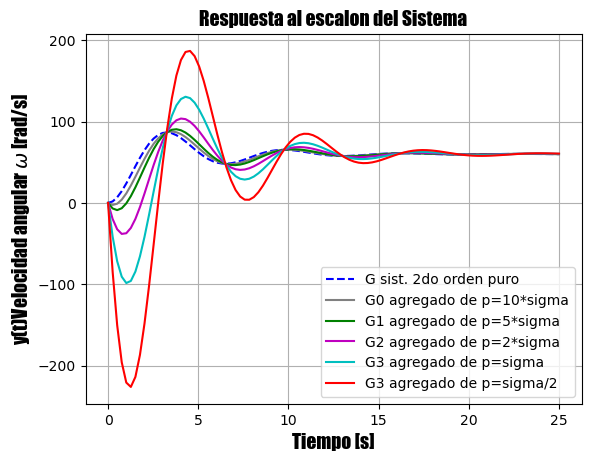

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

In [96]:
t1 = np.linspace(0, 25, 100) 
t,y=ct.step_response(H*12, T=t1)
t,y10=ct.step_response(F0*12, T=t1)
t,y11=ct.step_response(F1*12, T=t1)
t,y12=ct.step_response(F2*12, T=t1)
t,y13=ct.step_response(F3*12, T=t1)
t,y14=ct.step_response(F4*12, T=t1)


plt.plot(t, y, color="b",linestyle='--', label = 'G sist. 2do orden puro')
plt.plot(t, y10, color="gray", label = 'G0 agregado de p=10*sigma')
plt.plot(t, y11, color="g", label = 'G1 agregado de p=5*sigma')
plt.plot(t, y12, color="m", label = 'G2 agregado de p=2*sigma')
plt.plot(t, y13, color="c", label = 'G3 agregado de p=sigma')
plt.plot(t, y14, color="r", label = 'G3 agregado de p=sigma/2')
plt.xlabel('Tiempo [s]', fontdict=fuente)
plt.ylabel(r'y(t)Velocidad angular $\omega$ [rad/s]', fontdict=fuente)
plt.title('Respuesta al escalon del Sistema', fontdict=fuente)
plt.grid()
plt.legend(loc=4)
plt.show()
plt.plot